# Data import

In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)


In [3]:
import pandas as pd

## Upload the Data and Read the .csv File

In [5]:
df = pd.read_csv('unegui.mn_dataset.csv')
print(df.head())

      Шал       Тагт Ашиглалтанд орсон он    Гараж   Цонх Барилгын давхар  \
0  Паркет    Тагтгүй                 2020  Байхгүй  Вакум              16   
1  Паркет  1 тагттай                 2009  Байхгүй  Вакум              17   
2  Паркет    Тагтгүй                 2009  Байхгүй  Вакум               5   
3  Паркет  1 тагттай                 2018  Байхгүй  Вакум               6   
4  Паркет  1 тагттай                 2015  Байхгүй  Вакум               8   

   Хаалга    Талбай Хэдэн давхарт            Лизинг  ...        Байршил  \
0  Бүргэд  24.04 м²             4         Лизинггүй  ...  16-р хороолол   
1  Бүргэд   54.0 м²             8  Банкны лизингтэй  ...  13-р хороолол   
2  Бүргэд   38.6 м²             5         Лизинггүй  ...      Viva city   
3  Бүргэд   31.0 м²             1         Лизинггүй  ...      Найрамдал   
4  Бүргэд   38.0 м²             8         Лизинггүй  ...  16-р хороолол   

  Зарын дугаар:                         Огноо  \
0        4580385  Нийтэлсэн: 2020-12-

# Data Exploration

**Challange**:

* Dataset хэдэн мөр (row), багана (column) агуулж байна вэ?


In [6]:
row_num = df.shape[0]
print("Total number of rows:", row_num)

Total number of rows: 27861


In [7]:
col_num = df.shape[1]
print("Total number of columns:", col_num)

Total number of columns: 22


# Data cleaning

**Challange**:

* w1_data дата ийн баганын нэр, өгөгдлийн төрөл, non-null утгын тоо зэрэг мэдээллийг шалга.

* w1_data-д аль баганад хэдэн хоосон утга байгааг ол.

In [9]:
w1_data = df.iloc[0]
w1_dat_null = w1_data.isnull().sum()
w1_data_not_null = col_num - w1_dat_null
print("First row - Null values:", w1_dat_null)
print("First row - Not null values:", w1_data_not_null)
print("First row data:\n", w1_data)

First row - Null values: 2
First row - Not null values: 20
First row data:
 Шал                                                          Паркет
Тагт                                                        Тагтгүй
Ашиглалтанд орсон он                                           2020
Гараж                                                       Байхгүй
Цонх                                                          Вакум
Барилгын давхар                                                  16
Хаалга                                                       Бүргэд
Талбай                                                     24.04 м²
Хэдэн давхарт                                                     4
Лизинг                                                    Лизинггүй
Дүүрэг                                                     Баянзүрх
Цонхны тоо                                                        1
Байршил                                               16-р хороолол
Зарын дугаар:                           

In [ ]:
df.drop('Хэрэглэгчийн нэр', axis=0, inplace=True)
df.drop('Хэрэглэгчийн дугаар',axis=0, inplace=True)
df.drop('Зарын дугаар', axis=0, inplace=True)
df.drop('Үзсэн', axis=0, inplace=True)
df.drop('Зарын тайлбар', axis=0, inplace=True)
print(df.iloc[0])

Шал                                                          Паркет
Тагт                                                        Тагтгүй
Ашиглалтанд орсон он                                           2020
Гараж                                                       Байхгүй
Цонх                                                          Вакум
Барилгын давхар                                                  16
Хаалга                                                       Бүргэд
Талбай                                                     24.04 м²
Хэдэн давхарт                                                     4
Лизинг                                                    Лизинггүй
Дүүрэг                                                     Баянзүрх
Цонхны тоо                                                        1
Байршил                                               16-р хороолол
Огноо                                   Нийтэлсэн: 2020-12-15 09:55
Зарын гарчиг            Бзд цайз захын баруун та

**Challange**:Шаардлагагүй багануудыг хасах

* Дараах багануудыг дата аас хасна уу:

Хэрэглэгчийн нэр

Хэрэглэгчийн дугаар

Зарын дугаар

Үзсэн

Зарын тайлбар

* Цэвэрлэсний дараах дата шалга

### Давхардсан утга алга болгох


**Challange**:

* дата давхардсан мөр байгаа эсэхийг шалга.

* Цэвэрлэсний дараах дата шалга

* Давхардсан мөрүүдийг дата аас устгана уу.

In [26]:
names = df
for i in names:
    is_duplicate = df[i].duplicated().sum()
    print(f"Column '{i}' has {is_duplicate} duplicate values.")
    clean_duplicates = df[i].drop_duplicates()
    print(f"Column '{i}' after removing duplicates:\n", clean_duplicates)
    print("-------------------")
df.drop_duplicates(inplace=True)

print("-------------------")
print("All completely duplicate rows have been removed.")

Column 'Шал' has 27854 duplicate values.
Column 'Шал' after removing duplicates:
 0       Паркет
6      Ламинат
20         Мод
80      Цемент
114      Плита
472      Чулуу
560        Шал
Name: Шал, dtype: object
-------------------
Column 'Тагт' has 27856 duplicate values.
Column 'Тагт' after removing duplicates:
 0          Тагтгүй
1        1 тагттай
7        2 тагттай
560           Тагт
1225    3+ тагттай
Name: Тагт, dtype: object
-------------------
Column 'Ашиглалтанд орсон он' has 27818 duplicate values.
Column 'Ашиглалтанд орсон он' after removing duplicates:
 0                      2020
1                      2009
3                      2018
4                      2015
5                      2013
6                      2010
7                      2000
9                      2002
11                     2014
16                     2017
20                     1992
21                     2021
24                     2006
26                     2012
27                     2005
29     

### Талбай, Огноо болон Ашиглалтанд орсон он баганын өгөгдлийг засварлах

**Challange**:

* Доорх кодыг нөхөж бичнэ үү!

In [27]:
print(df.columns)

Index(['Шал', 'Тагт', 'Ашиглалтанд орсон он', 'Гараж', 'Цонх',
       'Барилгын давхар', 'Хаалга', 'Талбай', 'Хэдэн давхарт', 'Лизинг',
       'Дүүрэг', 'Цонхны тоо', 'Байршил', 'Огноо', 'Зарын гарчиг', 'Үнэ',
       'Байрлал'],
      dtype='object')


In [29]:
df['Талбай'].value_counts()
df['Ашиглалтанд орсон он'].value_counts()
df['Огноо'].value_counts()

Огноо
Нийтэлсэн: 2020-01-30          294
Нийтэлсэн: 2020-05-19          119
Нийтэлсэн: 2020-10-05           98
Нийтэлсэн: 2020-11-03           95
Нийтэлсэн: 2020-10-20           91
                              ... 
Нийтэлсэн: 2020-01-24 18:34      1
Нийтэлсэн: 2020-01-24 18:13      1
Нийтэлсэн: 2020-01-24 19:29      1
Нийтэлсэн: 2020-01-24 18:00      1
Нийтэлсэн: 2020-01-28 13:23      1
Name: count, Length: 7292, dtype: int64

In [30]:
df.drop('Хэрэглэгчийн нэр', axis=0, inplace=True)
df.drop('Хэрэглэгчийн дугаар',axis=0, inplace=True)
df.drop('Зарын дугаар', axis=0, inplace=True)
df.drop('Үзсэн', axis=0, inplace=True)
df.drop('Зарын тайлбар', axis=0, inplace=True)
print(df.iloc[0])

KeyError: "['Хэрэглэгчийн нэр'] not found in axis"

In [31]:
df[df['Ашиглалтанд орсон он']=='Ашиглалтанд орсон он'] # Ашиглалтанд орсон он баганад байгаа утгыг "Ашиглалтанд орсон он" гэсэн string-тэй тэнцүү мөрүүдийг шүүж гарга.

,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,Лизинг,Дүүрэг,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал
560,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,Лизинг,Дүүрэг,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал


In [54]:
data_1 = df.drop([560], axis=0)

In [55]:
print(data_1[data_1['Ашиглалтанд орсон он']=='Ашиглалтанд орсон он'])

Empty DataFrame
Columns: [Шал, Тагт, Ашиглалтанд орсон он, Гараж, Цонх, Барилгын давхар, Хаалга, Талбай, Хэдэн давхарт, Лизинг, Дүүрэг, Цонхны тоо, Байршил, Огноо, Зарын гарчиг, Үнэ, Байрлал]
Index: []


In [56]:
data_1=data_1.reset_index()

In [57]:
print(data_1[data_1['Ашиглалтанд орсон он']=='Ашиглалтанд орсон он'])

Empty DataFrame
Columns: [index, Шал, Тагт, Ашиглалтанд орсон он, Гараж, Цонх, Барилгын давхар, Хаалга, Талбай, Хэдэн давхарт, Лизинг, Дүүрэг, Цонхны тоо, Байршил, Огноо, Зарын гарчиг, Үнэ, Байрлал]
Index: []


In [59]:
data_1.shape

(10583, 18)

In [62]:
data_1[["Ашиглалтанд орсон он"]].value_counts()

Ашиглалтанд орсон он
2020                    1366
2019                     907
2015                     844
2014                     821
2013                     783
2010                     762
2012                     640
2016                     510
2018                     484
2017                     451
2011                     336
2009                     304
1980                     275
1990                     272
2008                     257
1989                     219
1988                     144
2006                     113
1998                     103
2000                      94
1985                      84
2005                      84
1999                      69
1995                      65
2004                      65
2007                      61
1987                      60
1996                      47
1986                      45
1984                      42
1991                      36
1997                      33
1993                      28
1992                  

In [63]:
data_1["Огноо"].head()

0    Нийтэлсэн: 2020-12-15 09:55
1    Нийтэлсэн: 2020-12-15 08:08
2    Нийтэлсэн: 2021-01-02 10:40
3    Нийтэлсэн: 2021-01-02 13:01
4    Нийтэлсэн: 2020-12-18 10:31
Name: Огноо, dtype: object

In [64]:
data_1['Огноо'][0].replace("Нийтэлсэн: ","")

'2020-12-15 09:55'

In [65]:
data_1['Огноо'] = [date.replace('Нийтэлсэн: ', '').strip() for date in data_1['Огноо']]

In [66]:
data_1["Огноо"].head()

0    2020-12-15 09:55
1    2020-12-15 08:08
2    2021-01-02 10:40
3    2021-01-02 13:01
4    2020-12-18 10:31
Name: Огноо, dtype: object

In [67]:
data_1["Талбай"].value_counts()

Талбай
30.0 м²     617
18.0 м²     419
40.0 м²     341
32.0 м²     285
36.0 м²     278
           ... 
31.2 м²       1
30.01 м²      1
67.3 м²       1
41.7 м²       1
65.2 м²       1
Name: count, Length: 1129, dtype: int64

In [68]:
data_1['Талбай'] = [date.replace('м²', '').strip() for date in data_1['Талбай']]

In [69]:
data_1["Талбай"].head()

0    24.04
1     54.0
2     38.6
3     31.0
4     38.0
Name: Талбай, dtype: object

In [70]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 10583 non-null  int64 
 1   Шал                   10583 non-null  object
 2   Тагт                  10583 non-null  object
 3   Ашиглалтанд орсон он  10583 non-null  object
 4   Гараж                 10583 non-null  object
 5   Цонх                  10583 non-null  object
 6   Барилгын давхар       10583 non-null  object
 7   Хаалга                10583 non-null  object
 8   Талбай                10583 non-null  object
 9   Хэдэн давхарт         10583 non-null  object
 10  Лизинг                10583 non-null  object
 11  Дүүрэг                10583 non-null  object
 12  Цонхны тоо            10583 non-null  object
 13  Байршил               10583 non-null  object
 14  Огноо                 10583 non-null  object
 15  Зарын гарчиг          10583 non-null

In [71]:
data_1['Ашиглалтанд орсон он'] = data_1['Ашиглалтанд орсон он'].astype('int')
data_1['Огноо']=pd.to_datetime(data_1['Огноо'], format='mixed', errors='coerce')
data_1['Талбай']=data_1['Талбай'].astype('float')

In [72]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 10583 non-null  int64         
 1   Шал                   10583 non-null  object        
 2   Тагт                  10583 non-null  object        
 3   Ашиглалтанд орсон он  10583 non-null  int64         
 4   Гараж                 10583 non-null  object        
 5   Цонх                  10583 non-null  object        
 6   Барилгын давхар       10583 non-null  object        
 7   Хаалга                10583 non-null  object        
 8   Талбай                10583 non-null  float64       
 9   Хэдэн давхарт         10583 non-null  object        
 10  Лизинг                10583 non-null  object        
 11  Дүүрэг                10583 non-null  object        
 12  Цонхны тоо            10583 non-null  object        
 13  Байршил         

### Тодорхой утга бүхий багануудын өгөгдлийг засварлах

**Challange**:

* Доорх кодыг нөхөж бичнэ үү!

In [73]:
data_1.columns

Index(['index', 'Шал', 'Тагт', 'Ашиглалтанд орсон он', 'Гараж', 'Цонх',
       'Барилгын давхар', 'Хаалга', 'Талбай', 'Хэдэн давхарт', 'Лизинг',
       'Дүүрэг', 'Цонхны тоо', 'Байршил', 'Огноо', 'Зарын гарчиг', 'Үнэ',
       'Байрлал'],
      dtype='object')

In [74]:
cols = ['Барилгын давхар','Хэдэн давхарт','Цонхны тоо']

In [79]:
for col in cols:
    print(data_1[col].drop_duplicates()) # Давтагдаагүй утгыг хар

0       16
1       17
2        5
3        6
4        8
6       12
7        9
17       3
18       2
21      13
26       7
37       1
38      10
40       4
61      15
101     11
330     23
458     14
519     18
583     19
1372    24
2195    20
5671    21
7907    22
Name: Барилгын давхар, dtype: object
0        4
1        8
2        5
3        1
5        3
6       11
8        2
9        6
11      10
15       7
29       9
43      12
50      15
87      13
94      14
182     16
330     21
513     17
958     19
5447    25
9279    18
Name: Хэдэн давхарт, dtype: object
0       1
3       2
9       5
15      4
20      3
391     6
2469    8
Name: Цонхны тоо, dtype: object


In [84]:
for col in cols:
    data_1[col]=data_1[col].astype("int32") # data_1 энэ датаны төрлийг int болго
    print(data_1[col].dtype)

int32
int32
int32


In [85]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 10583 non-null  int64         
 1   Шал                   10583 non-null  object        
 2   Тагт                  10583 non-null  object        
 3   Ашиглалтанд орсон он  10583 non-null  int64         
 4   Гараж                 10583 non-null  object        
 5   Цонх                  10583 non-null  object        
 6   Барилгын давхар       10583 non-null  int32         
 7   Хаалга                10583 non-null  object        
 8   Талбай                10583 non-null  float64       
 9   Хэдэн давхарт         10583 non-null  int32         
 10  Лизинг                10583 non-null  object        
 11  Дүүрэг                10583 non-null  object        
 12  Цонхны тоо            10583 non-null  int32         
 13  Байршил         

In [86]:
col_cat = ["Шал","Тагт","Гараж","Цонх","Хаалга","Лизинг"]

In [87]:
for col in col_cat:
    print(data_1[col].unique())

['Паркет' 'Ламинат' 'Мод' 'Цемент' 'Плита' 'Чулуу']
['Тагтгүй' '1 тагттай' '2 тагттай' '3+ тагттай']
['Байхгүй' 'Байгаа']
['Вакум' 'Төмөр вакум' 'Модон вакум' 'Мод']
['Бүргэд' 'Төмөр' 'Мод' 'Вакум' 'Төмөр вакум']
['Лизинггүй' 'Банкны лизингтэй' 'Хувь лизингтэй']


In [88]:
for col in col_cat:
    data_1[col]=data_1[col].astype('category')
    print(data_1[col].dtype)

category
category
category
category
category
category


In [89]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 10583 non-null  int64         
 1   Шал                   10583 non-null  category      
 2   Тагт                  10583 non-null  category      
 3   Ашиглалтанд орсон он  10583 non-null  int64         
 4   Гараж                 10583 non-null  category      
 5   Цонх                  10583 non-null  category      
 6   Барилгын давхар       10583 non-null  int32         
 7   Хаалга                10583 non-null  category      
 8   Талбай                10583 non-null  float64       
 9   Хэдэн давхарт         10583 non-null  int32         
 10  Лизинг                10583 non-null  category      
 11  Дүүрэг                10583 non-null  object        
 12  Цонхны тоо            10583 non-null  int32         
 13  Байршил         

In [90]:
data_2 = data_1

In [91]:
data_2['Үнэ'].value_counts()

Үнэ
55000000.0      458
65000000.0      433
45000000.0      394
60000000.0      368
50000000.0      335
               ... 
131520000.00      1
79200000.00       1
165600000.00      1
122500000.00      1
78698000.00       1
Name: count, Length: 771, dtype: int64

In [92]:
data_2['Үнэ']=data_2['Үнэ'].astype('float')

In [93]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 10583 non-null  int64         
 1   Шал                   10583 non-null  category      
 2   Тагт                  10583 non-null  category      
 3   Ашиглалтанд орсон он  10583 non-null  int64         
 4   Гараж                 10583 non-null  category      
 5   Цонх                  10583 non-null  category      
 6   Барилгын давхар       10583 non-null  int32         
 7   Хаалга                10583 non-null  category      
 8   Талбай                10583 non-null  float64       
 9   Хэдэн давхарт         10583 non-null  int32         
 10  Лизинг                10583 non-null  category      
 11  Дүүрэг                10583 non-null  object        
 12  Цонхны тоо            10583 non-null  int32         
 13  Байршил         

### Өгөгдлийн сангийн дэлгэрэнгүй мэдээллийг харах

**Challange**:

* Доорх кодыг нөхөж бичнэ үү!

In [94]:
data_2.describe(include=['object'])

,Дүүрэг,Байршил,Зарын гарчиг,Байрлал
count,10583,10583,10583,10583
unique,10,74,5551,15
top,Баянзүрх,Бусад,1 өрөө байр,Улаанбаатар
freq,3434,1442,406,10463


In [95]:
data_2.float_format='{: .2f}'.format
data_2.describe()

,index,Ашиглалтанд орсон он,Барилгын давхар,Талбай,Хэдэн давхарт,Цонхны тоо,Огноо,Үнэ
count,10583.000000,10583.000000,10583.000000,1.058300e+04,10583.000000,10583.000000,10583,1.058300e+04
mean,12010.947557,2010.487858,9.866673,1.713655e+04,5.768213,1.890201,2020-05-09 22:41:26.793914624,5.444191e+07
min,0.000000,1980.000000,1.000000,0.000000e+00,1.000000,1.000000,2019-12-07 20:50:00,1.000000e+00
25%,2893.500000,2009.000000,6.000000,3.000000e+01,3.000000,1.000000,2020-01-30 00:00:00,4.100000e+07
50%,14151.000000,2014.000000,10.000000,3.476000e+01,5.000000,2.000000,2020-03-19 00:00:00,5.500000e+07
75%,18921.500000,2018.000000,12.000000,4.200000e+01,8.000000,2.000000,2020-09-29 11:45:00,6.890000e+07
max,27858.000000,2021.000000,24.000000,9.928673e+07,25.000000,8.000000,2021-01-14 00:00:00,7.130000e+08
std,8280.116845,10.383436,4.159444,1.239573e+06,3.897579,0.823627,NaN,3.305106e+07


###### Үнэ болон талбай гэсэн 2 багана нь бодит бус өгөгдлийг агуулж байна

**Challange**:

* Доорх кодыг нөхөж бичнэ үү!

In [97]:
print(data_2["Талбай"].max()) # Талбайн max утгыг гарга

99286728.0


In [98]:
print(data_2["Үнэ"].max()) # Үнийн max утгыг гарга

713000000.0


In [99]:
max_price = data_2["Үнэ"].max()# Үнийн max утгын мөрийг гаргаж ир
max_col = data_2[data_2["Үнэ"]==max_price]
print(max_col)

     index     Шал     Тагт  Ашиглалтанд орсон он    Гараж   Цонх  \
820   1062  Паркет  Тагтгүй                  2018  Байхгүй  Вакум   

     Барилгын давхар Хаалга  Талбай  Хэдэн давхарт     Лизинг     Дүүрэг  \
820               16  Төмөр   105.0             13  Лизинггүй  Сүхбаатар   

     Цонхны тоо Байршил               Огноо                Зарын гарчиг  \
820           3   Бусад 2020-01-26 13:47:00  Meru tower-т 105мкв 2 өрөө   

             Үнэ      Байрлал  
820  713000000.0  Улаанбаатар  


In [100]:
 # Талбайн min утгыг гарга
print(data_2['Талбай'].min())

0.0


In [101]:
data_2['Талбай'].mean()

np.float64(17136.554008787676)

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Defaulting to user installation because normal site-packages is not writeable


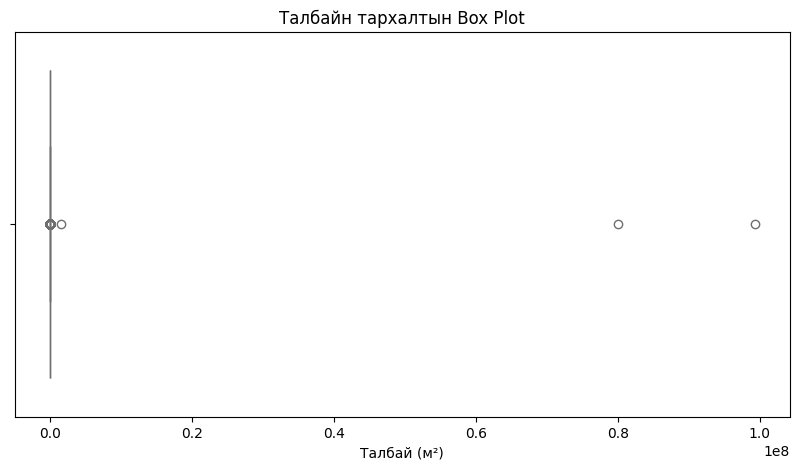

In [104]:
!pip install seaborn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. 'Талбай' баганыг тоон төрөл рүү хөрвүүлэх (хэрэв хөрвүүлээгүй бол)
# " м²" гэсэн текстийг устгаад float болгоно
data_2['Талбай_numeric'] = data_2['Талбай'].replace(r'[^\d.]', '', regex=True).astype(float)

# 2. Box plot зурах
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_2['Талбай_numeric'], color='skyblue')

plt.title('Талбайн тархалтын Box Plot')
plt.xlabel('Талбай (м²)')
plt.show()

### Талбай баганын өгөгдлийг цэвэрлэх.
### Бага болон их утгыг хоосон(NaN) болгох

**Challange**:

* Доорх кодыг нөхөж бичнэ үү!

In [137]:
import pandas as pd
# Текстээс зөвхөн тоог нь салгаж аваад float болгох
data = data_2['Талбай'][:]
for i in range(0,len(data)):
    area = data[i]
    if area == 0 or area >=500:
        print({i})
condition = (data_2['Талбай']==0) | (data_2['Талбай'] >=500)
extreme_case =  data_2[condition]
print(extreme_case)

{692}
{764}
{811}
{865}
{1707}
{2236}
{2249}
{2340}
{2428}
{2716}
{3070}
{3639}
{3654}
{3683}
{3694}
{3750}
{3755}
{3864}
{3879}
{5121}
{5192}
{5238}
{5952}
{6247}
{6844}
{7531}
{7838}
{8327}
{9182}
{9415}
{10507}
       index     Шал       Тагт  Ашиглалтанд орсон он    Гараж         Цонх  \
692      757  Паркет  1 тагттай                  1999  Байхгүй          Мод   
764     1003  Паркет  1 тагттай                  2008  Байхгүй        Вакум   
811     1052  Паркет  1 тагттай                  2012  Байхгүй        Вакум   
865     1107  Паркет  1 тагттай                  1988  Байхгүй        Вакум   
1707    1955  Паркет  1 тагттай                  2000  Байхгүй        Вакум   
2236    2484  Цемент    Тагтгүй                  1989  Байхгүй        Вакум   
2249    2497     Мод  1 тагттай                  1996  Байхгүй        Вакум   
2340    2588     Мод  1 тагттай                  1980  Байхгүй  Модон вакум   
2428    2676  Паркет  1 тагттай                  1988  Байхгүй        Вакум

In [139]:
print(extreme_case['Талбай'].count()) # Талбай нь 0 эсвэл 500-аас их байгаа хэдэн мөр байгааг шүүж гарга

31


In [140]:
print(extreme_case['Зарын гарчиг'])# Алдаатай эсвэл хэт их талбайтай заруудын гарчгийг олж хар

692                             Gal togoo tusda 2oroo bair
764                       Бөхийн өргөөнд 2 өрөө байр 67мкв
811      Жуков автобусны буудалын урд талд 45.65мкв 2 ө...
865                           Натурын зам дагуу 2өрөө байр
1707                  Схд- н 21рхороололд 2 өрөө 43м2 байр
2236                                          Дгт.н 2 өрөө
2249                      13н дунд зам натурын хойно 2өрөө
2340                  Эрдэнэт төмөр зам вокзалд 2өрөө байр
2428                                 Багануурт 2 өрөө байр
2716                      Orbitiin tsergiin hothond 1 uruu
3070              Sansariin 805 tsagdaa hothond 1uruu bair
3639                         Gal togoon tusdaa 1 oroo bair
3654     Дархан-хээтэй хороолол 2-б хуучин оросууд барь...
3683                         Gal togoon tusdaa 1 oroo bair
3694     Дархан-хээтэй хороолол 2-б хуучин оросууд барь...
3750                              Хайрхан хороололд 1 өрөө
3755                                     Хотын төвд 1 өр

In [141]:
import numpy as np

In [142]:
data_2['Талбай'][(data_2['Талбай'] == 0) | (data_2['Талбай'] >500)]=np.nan

/tmp/ipykernel_12048/2048569906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Талбай'][(data_2['Талбай'] == 0) | (data_2['Талбай'] >500)]=np.nan


In [143]:
data_2['Талбай'].isnull().sum()

np.int64(31)

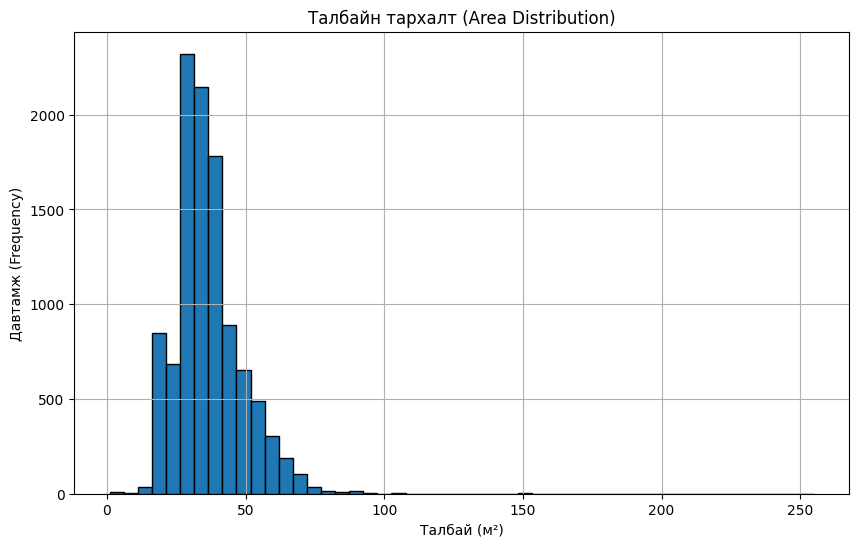

In [144]:
import matplotlib.pyplot as plt

# We dropna() to ensure missing values don't interfere
data_2['Талбай'].dropna().hist(bins=50, edgecolor='black', figsize=(10,6))

plt.title('Талбайн тархалт (Area Distribution)')
plt.xlabel('Талбай (м²)')
plt.ylabel('Давтамж (Frequency)')
plt.show() # Талбайг histogram аар хар

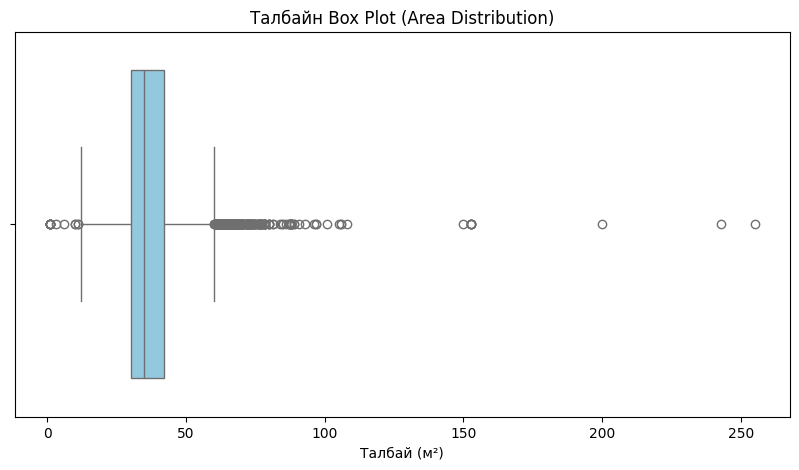

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data_2['Талбай'], color='skyblue')

plt.title('Талбайн Box Plot (Area Distribution)')
plt.xlabel('Талбай (м²)')
plt.show() # Талбайг box plot аар хар

In [148]:
normal_condition = (data_2['Талбай'] >= 150) & (data_2['Талбай'] < 500)# Дундаас том харьцангуй “хэвийн” гэж үзэж болох талбайнуудыг гарга (150 аас их 500 аас бага талбай)
normal = data_2[normal_condition]
print(normal['Талбай'])
print(len(normal))

1281    150.0
3737    152.8
3742    152.8
3850    152.8
3856    152.8
5450    243.0
6384    200.0
6408    152.8
8638    255.0
Name: Талбай, dtype: float64
9


In [149]:
data_2[normal_condition].query('Талбай >150 or Талбай >500')

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,Лизинг,Дүүрэг,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric
3737,6127,Паркет,Тагтгүй,2013,Байхгүй,Вакум,10,Бүргэд,152.8,1,Лизинггүй,Баянзүрх,6,Зүүн 4 зам,2020-02-13 15:05:00,"4.жаст хотхонд 152,8м.кв шинэ орон сууц",252120000.0,Улаанбаатар,152.8
3742,6132,Паркет,Тагтгүй,2013,Байхгүй,Вакум,10,Бүргэд,152.8,1,Лизинггүй,Баянзүрх,6,13-р хороолол,2020-02-13 17:03:00,"Жаст хотхонд 152,8м.кв 1 өрөө",252120000.0,Улаанбаатар,152.8
3850,6469,Паркет,Тагтгүй,2013,Байхгүй,Вакум,10,Бүргэд,152.8,1,Лизинггүй,Баянзүрх,6,Зүүн 4 зам,2020-02-18 00:00:00,"4.жаст хотхонд 152,8м.кв шинэ орон сууц",252120000.0,Улаанбаатар,152.8
3856,6475,Паркет,Тагтгүй,2013,Байхгүй,Вакум,10,Бүргэд,152.8,1,Лизинггүй,Баянзүрх,6,13-р хороолол,2020-02-18 00:00:00,"Жаст хотхонд 152,8м.кв 1 өрөө",252120000.0,Улаанбаатар,152.8
5450,14703,Паркет,1 тагттай,2011,Байхгүй,Вакум,13,Бүргэд,243.0,11,Лизинггүй,Сонгино Хайрхан,1,21-р хороолол,2020-03-17 17:20:00,1өрөө байр,36000000.0,Улаанбаатар,243.0
6384,16625,Паркет,Тагтгүй,2013,Байхгүй,Вакум,1,Бүргэд,200.0,1,Хувь лизингтэй,Орон нутаг,8,Бусад,2020-04-09 13:29:00,"Эрдэнэтэд 1өрөө, өргөтгөлийн хамт",100000000.0,Улаанбаатар,200.0
6408,16649,Паркет,Тагтгүй,2013,Байхгүй,Вакум,10,Бүргэд,152.8,1,Лизинггүй,Баянзүрх,6,Зүүн 4 зам,2020-04-15 11:09:00,"Жаст хотхонд 152,8м.кв орон сууц",252120000.0,Улаанбаатар,152.8
8638,19629,Паркет,1 тагттай,2013,Байхгүй,Вакум,6,Бүргэд,255.0,1,Лизинггүй,Сонгино Хайрхан,1,Ханын материал,2020-10-07 22:25:00,Ханын материалд 1өрөө байр 25м2,38000000.0,Улаанбаатар,255.0


In [150]:
data_2['Талбай'][(data_2['Талбай'] >200)]=np.nan

/tmp/ipykernel_12048/3051748184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Талбай'][(data_2['Талбай'] >200)]=np.nan


In [151]:
data_2['Талбай'].isnull().sum()

np.int64(33)

In [152]:
data_2[['Талбай']].describe()

,Талбай
count,10550.000000
mean,36.627116
std,12.114953
min,1.000000
25%,30.000000
50%,34.780000
75%,42.000000
max,200.000000


In [153]:
data_2[['Талбай']].query('Талбай<30').value_counts().reset_index().sort_values("Талбай")

,Талбай,count
43,1.00,8
113,3.00,1
112,6.00,1
87,10.00,2
86,11.00,2
...,...,...
95,29.80,2
32,29.89,11
40,29.90,9
145,29.96,1


In [154]:
data_2[['Зарын гарчиг','Талбай']].query('Талбай <15')

,Зарын гарчиг,Талбай
129,Шинэ амгалан хотхонд 34 мкв 1 өрөө,3.0
1697,2өрөө байр,11.0
1792,3.4-р хороололд 2 өрөө байр,10.0
2714,Nalaikht gal togoo tusdaa 1 uruu bair,11.0
2882,1 өрөө байр,12.0
3456,1 uruu bair,1.0
3552,Хагас подвол,14.0
3604,Хагас подвол,14.0
5138,1 өрөө,10.0
5447,1 uruu bair,1.0


In [155]:
data_2['Талбай'][(data_2['Талбай'] <=12)]=np.nan

/tmp/ipykernel_12048/2330996276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Талбай'][(data_2['Талбай'] <=12)]=np.nan


In [156]:
data_2['Талбай'].isnull().sum()

np.int64(50)

In [157]:
data_2['Талбай'].isna().sum()

np.int64(50)

### NaN утгуудыг тохирсон утгаар нөхөх

##### Зарын гарчигаас талбайг олж нөхөх

**Challange**:

* Доорх кодыг нөхөж бичнэ үү!

In [158]:
convertor = {
    'А': 'A', 'Б': 'B', 'В': 'V', 'Г': 'G', 'Д': 'D', 'Е': 'E', 'Ё': 'Yo',
    'Ж': 'J', 'З': 'Z', 'И': 'I', 'Й': 'I', 'К': 'K', 'Л': 'L', 'М': 'M',
    'Н': 'N', 'О': 'O', 'Ө': 'O', 'П': 'P', 'Р': 'R', 'С': 'S', 'Т': 'T',
    'У': 'U', 'Ү': 'U', 'Ф': 'F', 'Х': 'Kh', 'Ц': 'Ts', 'Ч': 'Ch', 'Ш': 'Sh',
    'Щ': 'Shch', 'Ы': 'Y', 'Ь': 'I', 'Э': 'E', 'Ю': 'Yu', 'Я': 'Ya',
    # Жижиг үсгүүд
    'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd', 'е': 'e', 'ё': 'yo',
    'ж': 'j', 'з': 'z', 'и': 'i', 'й': 'i', 'к': 'k', 'л': 'l', 'м': 'm',
    'н': 'n', 'о': 'o', 'ө': 'o', 'п': 'p', 'р': 'r', 'с': 's', 'т': 't',
    'у': 'u', 'ү': 'u', 'ф': 'f', 'х': 'kh', 'ц': 'ts', 'ч': 'ch', 'ш': 'sh',
    'щ': 'shch', 'ы': 'y', 'ь': 'i', 'э': 'e', 'ю': 'yu', 'я': 'ya',
    # Ъ үсгийг хөрвүүлэхгүй (хоосон орхино эсвэл жагсаалтаас хасна)
    'Ъ': '', 'ъ': ''
}

In [159]:
for mon, eng in convertor.items():
    data_2["Зарын гарчиг"] = data_2["Зарын гарчиг"].str.upper().str.replace(mon, eng)

In [160]:
data_2["Зарын гарчиг"].head()

0    BZD TSAIZ ZAKHYN BARUUN TALD SHINE 1 OROO BAIR
1                  NARAN TUUL ZAKHYN KHAJUUD 1 OROO
2                    VIVAD MANSARTTAI 1 URUU 38.6M2
3                NAIRAMDAL ZUSLAN DOTOR 1 OROO BAIR
4                                       1 OROO BAIR
Name: Зарын гарчиг, dtype: object

In [161]:
import re

In [162]:
for row in data_2["Зарын гарчиг"]:
    row = re.sub(r'[-_#?!`/\(){}+=\d]+','', row).strip().split()
    print(row)

['BZD', 'TSAIZ', 'ZAKHYN', 'BARUUN', 'TALD', 'SHINE', 'OROO', 'BAIR']
['NARAN', 'TUUL', 'ZAKHYN', 'KHAJUUD', 'OROO']
['VIVAD', 'MANSARTTAI', 'URUU', '.M']
['NAIRAMDAL', 'ZUSLAN', 'DOTOR', 'OROO', 'BAIR']
['OROO', 'BAIR']
['UILDVERCHIN', 'KHOTKHOND', 'OROO', 'BAIR']
['BZD', 'KHOROO', 'AMAN', 'KHUURYN', 'BARUUN', 'TALD', 'OROO', 'BAIR']
['R', 'KHOROOLOL', 'KHARKHORIN', 'ZAKHYN', 'KHOINO', 'OROO', 'BAIR', 'M']
['BZD', 'KHOROOND', 'OROO', 'BAIR']
['KHERMESIIN', 'ZUUN', 'KHOINO', 'OROO']
['ALTAI', 'KHOTKHONY', 'KHOINO', 'BARS', 'ZAKHYN', 'URD.M']
['NARNY', 'KHOROOLOLD', ',M', 'OROO']
['VIVA', 'SITI', 'KHOTKHOND', 'OROO']
['NARNY', 'KHOROOLOLD', 'OROO']
['VIVA', 'CITY,', 'OROO', '.M']
['BAYANZURKH', 'APARTMENT', 'OROO', 'BAIR']
['NAIRAMDAL', 'ZUSLAN', 'DOTOR', 'OROO']
['R', 'KHOROOLOLD', 'OROO']
['KHAN', 'UUL', 'DUUREG', 'IREEDUI', 'KHOTKHON', 'OROO']
['BUYANTUKHAA', 'KHOROOLOLD', 'OROO', 'BAIR', 'M']
['SANSART', 'GAL', 'TOGOO', 'TUSDAA', 'OROO', 'BAIR']
['OROO', 'BAIR']
['OROO', 'MKV', 'BAI

In [163]:
m2 = []

for row in data_2["Зарын гарчиг"]:
    row = re.sub(r'[-_#?!`/\(){}+=\d]+','', row).strip().split()

    for word in row:
        if word.find("M", 0)==0 and word not in m2 and len(word)<4:
            m2.append(word)

In [164]:
m2

['M',
 'MKV',
 'MK',
 'M.',
 'M,',
 'M²',
 'MT',
 'MIU',
 'MV',
 'MK.',
 'MVK',
 'MK²',
 'MKB']

In [165]:
m2 = [
 'MKV',
 'MK',
 'M2',
 'M.2',
 'MK2',
 'M²',
 'MK.',
 'MVK',
 'MK²',
 'MKB']

In [166]:
m2_utga = []

for row in data_2['Зарын гарчиг']:
    ind = 0
    row = row.replace(',','.')
    row = row.replace("'",".")

    for m in m2:
        if row.find(m)!=-1:
            ind = row.find(m)
    row = row[ind-6:ind]
    row = re.sub(r'[A-Z-_#?!~`/\(){}+=]+', '', row).strip().split()

    if len(row)==0:
        m2_utga.append(np.nan)
    elif (len(row)==1) & (len(row[0])>1):
        m2_utga.append(row[0])
    elif len(row)==1:
        m2_utga.append(np.nan)
    elif (len(row)>=2):
        m2_utga.append(row[-1])
    else:
        m2_utga.append(np.nan)

In [167]:
np.unique(m2_utga)

array(['.35', '101', '105', '106', '108', '12', '14', '15', '150', '16',
       '17', '17.5', '18', '18.2', '19', '19.27', '2.32', '2.93', '20',
       '20.14', '20.2', '20.4', '20.5', '21', '21.1', '21.7', '22',
       '22.15', '22.3', '22.4', '22.44', '22.6', '22.8', '22.9', '23',
       '23.1', '23.22', '23.3', '23.47', '23.67', '24', '24.04', '24.2',
       '24.32', '24.5', '24.6', '24.7', '25', '25.0', '25.41', '25.5',
       '25.6', '26', '26.0', '26.16', '26.27', '26.28', '26.3', '26.4',
       '26.6', '26.68', '26.8', '26.97', '27', '27.3', '27.5', '27.57',
       '27.62', '27.71', '27.75', '27.85', '27.86', '27.9', '28', '28.03',
       '28.1', '28.2', '28.26', '28.3', '28.31', '28.5', '28.53', '28.54',
       '28.6', '28.75', '28.9', '28.94', '28.97', '29', '29.28', '29.31',
       '29.33', '29.34', '29.37', '29.45', '29.49', '29.5', '29.53',
       '29.54', '29.63', '29.65', '29.72', '29.9', '29.96', '29.97', '30',
       '30.02', '30.05', '30.1', '30.15', '30.3', '30.33', '

In [168]:
data_2['Талбай1'] = m2_utga

In [169]:
data_2['Талбай1'].count()

np.int64(5876)

In [170]:
data_2.head()

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,Лизинг,Дүүрэг,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric,Талбай1
0,0,Паркет,Тагтгүй,2020,Байхгүй,Вакум,16,Бүргэд,24.04,4,Лизинггүй,Баянзүрх,1,16-р хороолол,2020-12-15 09:55:00,BZD TSAIZ ZAKHYN BARUUN TALD SHINE 1 OROO BAIR,43000000.0,Улаанбаатар,24.04,NaN
1,1,Паркет,1 тагттай,2009,Байхгүй,Вакум,17,Бүргэд,54.00,8,Банкны лизингтэй,Баянзүрх,1,13-р хороолол,2020-12-15 08:08:00,NARAN TUUL ZAKHYN KHAJUUD 1 OROO,76000000.0,Улаанбаатар,54.00,NaN
2,2,Паркет,Тагтгүй,2009,Байхгүй,Вакум,5,Бүргэд,38.60,5,Лизинггүй,Хан-Уул,1,Viva city,2021-01-02 10:40:00,VIVAD MANSARTTAI 1 URUU 38.6M2,66000000.0,Улаанбаатар,38.60,38.6
3,3,Паркет,1 тагттай,2018,Байхгүй,Вакум,6,Бүргэд,31.00,1,Лизинггүй,Сонгино Хайрхан,2,Найрамдал,2021-01-02 13:01:00,NAIRAMDAL ZUSLAN DOTOR 1 OROO BAIR,72000000.0,Улаанбаатар,31.00,NaN
4,4,Паркет,1 тагттай,2015,Байхгүй,Вакум,8,Бүргэд,38.00,8,Лизинггүй,Баянзүрх,2,16-р хороолол,2020-12-18 10:31:00,1 OROO BAIR,58000000.0,Улаанбаатар,38.00,NaN


In [171]:
data_2["Талбай"].isnull().sum()

np.int64(50)

In [172]:
data_2["Талбай"]=data_2["Талбай"].fillna(data_2["Талбай1"])

In [173]:
data_2["Талбай"].isnull().sum()

np.int64(44)

In [174]:
data_2["Талбай"].dtype

dtype('O')

In [175]:
data_2['Талбай']=data_2['Талбай'].astype('float')

In [176]:
data_2.head()

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,Лизинг,Дүүрэг,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric,Талбай1
0,0,Паркет,Тагтгүй,2020,Байхгүй,Вакум,16,Бүргэд,24.04,4,Лизинггүй,Баянзүрх,1,16-р хороолол,2020-12-15 09:55:00,BZD TSAIZ ZAKHYN BARUUN TALD SHINE 1 OROO BAIR,43000000.0,Улаанбаатар,24.04,NaN
1,1,Паркет,1 тагттай,2009,Байхгүй,Вакум,17,Бүргэд,54.00,8,Банкны лизингтэй,Баянзүрх,1,13-р хороолол,2020-12-15 08:08:00,NARAN TUUL ZAKHYN KHAJUUD 1 OROO,76000000.0,Улаанбаатар,54.00,NaN
2,2,Паркет,Тагтгүй,2009,Байхгүй,Вакум,5,Бүргэд,38.60,5,Лизинггүй,Хан-Уул,1,Viva city,2021-01-02 10:40:00,VIVAD MANSARTTAI 1 URUU 38.6M2,66000000.0,Улаанбаатар,38.60,38.6
3,3,Паркет,1 тагттай,2018,Байхгүй,Вакум,6,Бүргэд,31.00,1,Лизинггүй,Сонгино Хайрхан,2,Найрамдал,2021-01-02 13:01:00,NAIRAMDAL ZUSLAN DOTOR 1 OROO BAIR,72000000.0,Улаанбаатар,31.00,NaN
4,4,Паркет,1 тагттай,2015,Байхгүй,Вакум,8,Бүргэд,38.00,8,Лизинггүй,Баянзүрх,2,16-р хороолол,2020-12-18 10:31:00,1 OROO BAIR,58000000.0,Улаанбаатар,38.00,NaN


In [177]:
data_2["Талбай"].isnull().sum()

np.int64(44)

### үлдсэн 44 хоосон утгад цонхны тоо болон байршлаас хамааруулан утга оноох

In [178]:
sem=data_2.groupby(["Цонхны тоо", "Байршил"])

In [179]:
sem1=sem.agg({"Талбай":"mean"}).reset_index()

In [180]:
sem1

,Цонхны тоо,Байршил,Талбай
0,1,1-р хороолол,29.345926
1,1,10-р хороолол,29.674331
2,1,100 айл,32.645745
3,1,11-р хороолол,31.606216
4,1,120 мянгат,36.157949
...,...,...,...
257,6,Бусад,51.000000
258,6,Зүүн 4 зам,109.331111
259,6,Өгөөмөр захын зүүн,63.980000
260,8,Бусад,200.000000


In [181]:
data_2=data_2.merge(sem1.rename({'Талбай':'Талбай дундаж'}, axis=1), on =["Цонхны тоо", "Байршил"])

In [182]:
data_2.head()

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,...,Дүүрэг,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric,Талбай1,Талбай дундаж
0,0,Паркет,Тагтгүй,2020,Байхгүй,Вакум,16,Бүргэд,24.04,4,...,Баянзүрх,1,16-р хороолол,2020-12-15 09:55:00,BZD TSAIZ ZAKHYN BARUUN TALD SHINE 1 OROO BAIR,43000000.0,Улаанбаатар,24.04,NaN,28.926949
1,1,Паркет,1 тагттай,2009,Байхгүй,Вакум,17,Бүргэд,54.00,8,...,Баянзүрх,1,13-р хороолол,2020-12-15 08:08:00,NARAN TUUL ZAKHYN KHAJUUD 1 OROO,76000000.0,Улаанбаатар,54.00,NaN,34.936879
2,2,Паркет,Тагтгүй,2009,Байхгүй,Вакум,5,Бүргэд,38.60,5,...,Хан-Уул,1,Viva city,2021-01-02 10:40:00,VIVAD MANSARTTAI 1 URUU 38.6M2,66000000.0,Улаанбаатар,38.60,38.6,27.836612
3,3,Паркет,1 тагттай,2018,Байхгүй,Вакум,6,Бүргэд,31.00,1,...,Сонгино Хайрхан,2,Найрамдал,2021-01-02 13:01:00,NAIRAMDAL ZUSLAN DOTOR 1 OROO BAIR,72000000.0,Улаанбаатар,31.00,NaN,42.458333
4,4,Паркет,1 тагттай,2015,Байхгүй,Вакум,8,Бүргэд,38.00,8,...,Баянзүрх,2,16-р хороолол,2020-12-18 10:31:00,1 OROO BAIR,58000000.0,Улаанбаатар,38.00,NaN,35.177170


In [183]:
data_2["Талбай"]=data_2["Талбай"].fillna(data_2["Талбай дундаж"])

In [184]:
data_2["Талбай"].isnull().sum()

np.int64(2)

### 4.2.3 үлдсэн 2 хоосон утгад нийт үнийн медиан утгыг оноох

In [185]:
data_2[data_2.isna().sum(axis=1)>1]

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,...,Дүүрэг,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric,Талбай1,Талбай дундаж
9182,21246,Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,NaN,4,...,Чингэлтэй,5,Бага тойрог,2020-10-24 00:00:00,GAL TOGOO TUSDAA 1 URUU BAIR,68000000.0,Улаанбаатар,0.0,NaN,NaN
9415,21771,Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,NaN,4,...,Чингэлтэй,5,Бага тойрог,2020-10-23 18:20:00,GAL TOGOO TUSDAA 1 URUU BAIR,68000000.0,Улаанбаатар,0.0,NaN,NaN


In [186]:
data_2.shape

(10583, 21)

In [187]:
data_2.duplicated().sum()

np.int64(0)

In [188]:
data_2=data_2.drop([10578],axis=0)

In [189]:
data_2.shape

(10582, 21)

In [190]:
data_2['Талбай']=data_2['Талбай'].fillna(data_2['Талбай'].median())

In [191]:
data_2["Талбай"].isnull().sum()

np.int64(0)

In [192]:
data_2["Талбай"].describe()

count    10582.000000
mean        36.683622
std         12.046887
min         12.000000
25%         30.000000
50%         34.950000
75%         42.000000
max        200.000000
Name: Талбай, dtype: float64

<Axes: >

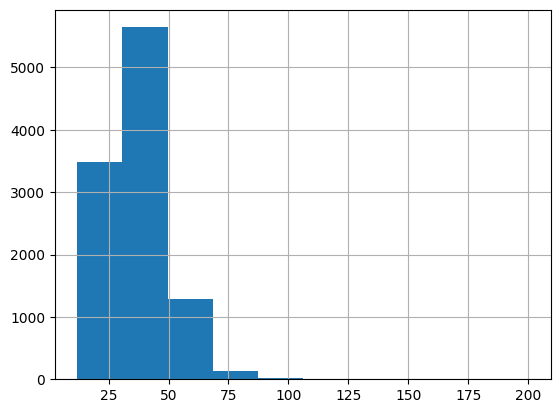

In [193]:
data_2["Талбай"].hist()

<Axes: xlabel='Талбай'>

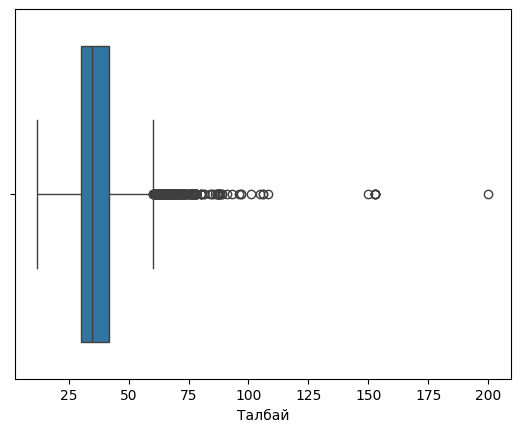

In [194]:
import seaborn as sns
sns.boxplot(x="Талбай", data = data_2)

### Outlier гэдэг нь бусад утгуудаас өөр жишээлбэл, хэтэрхий их эсвэл бага хэмжээтэй, эсвэл бусад үзүүлэлттэй холбоотой байдлыг харвал логикгүй байх утгуудыг хэлнэ.

### Үнэ баганын өгөгдлийг цэвэрлэх.
### Бага болон их утгыг хоосон(NaN) болгох

In [195]:
pd.options.display.float_format = '{:.2f}'.format
data_2["Үнэ"].describe()

count       10582.00
mean     54441852.40
std      33052617.01
min             1.00
25%      41000000.00
50%      55000000.00
75%      68900000.00
max     713000000.00
Name: Үнэ, dtype: float64

<Axes: xlabel='Үнэ'>

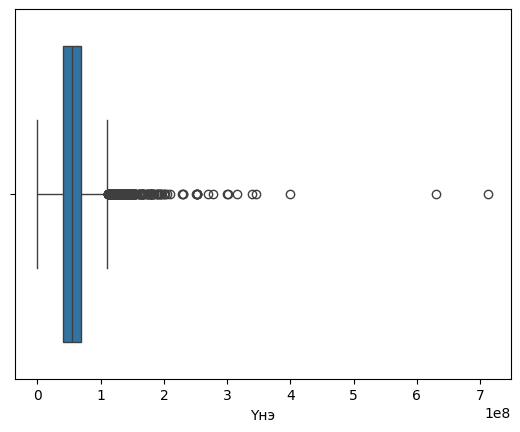

In [196]:
import seaborn as sns
sns.boxplot(x="Үнэ", data = data_2)

In [197]:
data_2[data_2["Үнэ"]>=300000000]

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,...,Дүүрэг,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric,Талбай1,Талбай дундаж
820,1062,Паркет,Тагтгүй,2018,Байхгүй,Вакум,16,Төмөр,105.00,13,...,Сүхбаатар,3,Бусад,2020-01-26 13:47:00,MERU TOWER-T 105MKV 2 OROO,713000000.00,Улаанбаатар,105.00,105,44.60
828,1070,Паркет,Тагтгүй,1988,Байхгүй,Вакум,12,Бүргэд,28.00,1,...,Баянгол,2,"3, 4 хороолол",2020-01-26 15:48:00,4-R KHOROOLOL 2 OROO,400000000.00,Улаанбаатар,28.00,NaN,35.06
953,1195,Паркет,1 тагттай,2019,Байхгүй,Вакум,16,Бүргэд,65.00,10,...,Сүхбаатар,2,Бусад,2020-01-27 12:57:00,TSIRKIIN URD 2 OROO 65 M2,302000000.00,Улаанбаатар,65.00,65,38.26
1526,1773,Паркет,Тагтгүй,2019,Байхгүй,Вакум,5,Бүргэд,106.00,16,...,Хан-Уул,4,Бусад,2020-01-06 16:03:00,KHAN HILLSD 3 OROO BAIR 106M2,345000000.00,Улаанбаатар,106.00,106,56.20
2024,2272,Паркет,1 тагттай,2018,Байхгүй,Төмөр вакум,5,Төмөр,106.00,14,...,Хан-Уул,3,Бусад,2020-01-14 10:30:00,KHAN HILLS 2 OROO,339200000.00,Улаанбаатар,106.00,NaN,44.60
2204,2452,Паркет,1 тагттай,2018,Байхгүй,Вакум,16,Бүргэд,64.91,12,...,Сүхбаатар,2,220 мянгат,2020-01-20 15:22:00,KHOTYN TOVD UB CENTRAL RESIDENCE 2 OROO,300000000.00,Улаанбаатар,64.91,NaN,42.98
2486,2734,Паркет,2 тагттай,2011,Байхгүй,Вакум,12,Бүргэд,63.10,1,...,Чингэлтэй,2,Бусад,2020-01-02 13:17:00,GANDIRS 2 OROO,315000000.00,Улаанбаатар,63.10,NaN,38.26
6219,16460,Паркет,1 тагттай,2013,Байхгүй,Вакум,12,Бүргэд,30.00,1,...,Хан-Уул,1,Хурд,2020-04-02 14:26:00,RAPID KHARSH KHOROOLOLD,630000000.00,Улаанбаатар,30.00,NaN,35.12


In [198]:
data_2['Үнэ'][data_2["Үнэ"]>400000000]=np.nan

/tmp/ipykernel_12048/1962298054.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_2['Үнэ'][data_2["Үнэ"]>400000000]=np.nan
/tmp/ipykernel_12048/1962298054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

<Axes: ylabel='Frequency'>

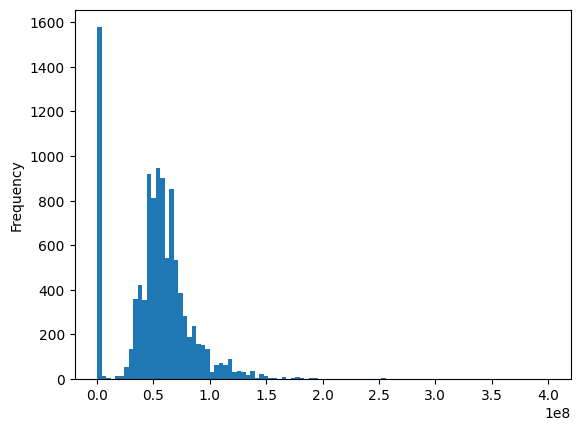

In [199]:
data_2["Үнэ"].plot(kind='hist', bins=100)

In [201]:
data_2[['Үнэ','Зарын гарчиг']][data_2['Үнэ']<100000]

,Үнэ,Зарын гарчиг
3623,1.00,NISEKHEES URAGSHAA BIO KOMBINATAD 1OROO 17MK BAIR
3791,62.00,5 SHARD 1 OROO 34M2 BAIR
4487,40.00,1URUU BAIR
4492,40.00,1URUU BAIR
5331,56.00,TSAMBAGARAVT NEG DAVKHRYN 1 OROO BAIR
8979,52.00,1OROO
9063,52.00,1OROO


### Хэтэрхий бага утгыг 1 саяаар үржүүлэх

In [202]:
data_2['Үнэ'][data_2['Үнэ']<100000] = data_2['Үнэ'][data_2['Үнэ']<100000]*1000000

/tmp/ipykernel_12048/11521000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Үнэ'][data_2['Үнэ']<100000] = data_2['Үнэ'][data_2['Үнэ']<100000]*1000000


<Axes: ylabel='Frequency'>

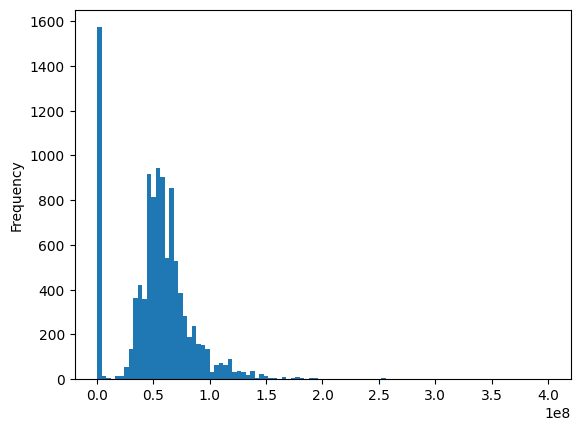

In [203]:
data_2["Үнэ"].plot(kind='hist', bins=100)

In [204]:
data_2[['Үнэ','Зарын гарчиг']][data_2['Үнэ']<5000000]

,Үнэ,Зарын гарчиг
17,1500000.00,21R KHOROOLOLD 1OROO
31,1260000.00,1 OROO 36.7MK BAIR
34,1650000.00,1 OROO
51,1900000.00,1 DAVKHARYN 1 OROO
57,1650000.00,ULAANHUARAND 1 URUU BAIR
...,...,...
10555,1800000.00,KHOROOLOLYN ETSES 85A BAIR 34MKV 1 OROO
10557,1700000.00,ENERENGUI UILSTEN KHOTKHON 1-R EELJIND 40.28M2...
10569,1600000.00,BZD EMNELEG CHANKH KHOINO DELGEREKH APARTMENT ...
10577,1600000.00,BZD IIN DELGEREKH KHOTKHOND 1OROO


### 5 саяаас их утгыг үнэ*талбай орлуулах

In [205]:
data_2['Үнэ 1']=data_2['Үнэ']*data_2['Талбай']

In [206]:
data_2['Үнэ'][data_2['Үнэ']<5000000]=data_2['Үнэ 1'][data_2['Үнэ']<5000000]

/tmp/ipykernel_12048/4212871906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Үнэ'][data_2['Үнэ']<5000000]=data_2['Үнэ 1'][data_2['Үнэ']<5000000]


<Axes: ylabel='Frequency'>

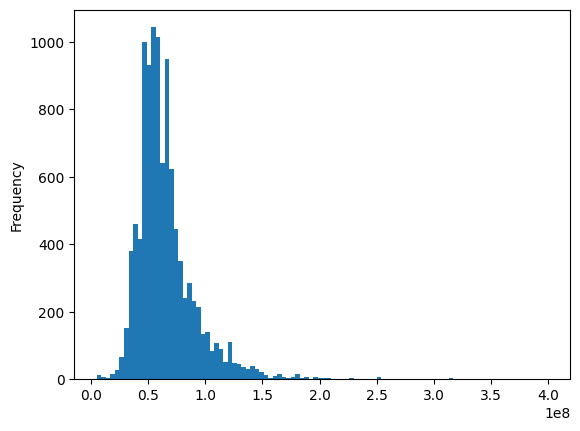

In [207]:
data_2["Үнэ"].plot(kind='hist', bins=100)

In [208]:
data_2[['Үнэ','Зарын гарчиг']][(data_2['Үнэ']>=5000000)&(data_2['Үнэ']<10000000)]

,Үнэ,Зарын гарчиг
2822,5000000.00,SHARYN GOLD KHUUCHNY 1 OROO BAIR
4305,6400000.00,1OROO BAIR
4360,6400000.00,1OROO BAIR
6045,8400000.00,1OROO BAIR
6290,5000000.00,MODNY 2 IIN ZAM DAGUU 1OROO BAIR
6361,7000000.00,TAVAN SHAR 1 OROO
6714,5300000.00,KTMC SURGUULIIIN ARD 1 URUU
6851,5200000.00,MISHEEL EXPO BARUUN TALD 1OROO 31M2 BAIR
7172,6900000.00,BOMBOGOR ZAKHIIKH URD 1OROO
9683,6100000.00,"KHUD, NISEKHIIN AVTOBUSNY BUUDLYN YAG KHAJUUD ..."


### 5.4 5 саяаас 10 саяын утгыг np.nan болгох

In [209]:
data_2[['Үнэ']][(data_2['Үнэ']>5000000)&(data_2['Үнэ']<10000000)]=np.nan

/tmp/ipykernel_12048/1252562461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[['Үнэ']][(data_2['Үнэ']>5000000)&(data_2['Үнэ']<10000000)]=np.nan
/tmp/ipykernel_12048/1252562461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[['Үнэ']][(data_2['Үнэ']>5000000)&(data_2['Үнэ']<10000000)]=np.nan


In [210]:
data_2['Үнэ'].isnull().sum()

np.int64(2)

In [211]:
data_2['Үнэ'].describe()

count       10580.00
mean     65310049.53
std      26383563.83
min       5000000.00
25%      49000000.00
50%      60000000.00
75%      75000000.00
max     400000000.00
Name: Үнэ, dtype: float64

In [212]:
data_2[data_2['Үнэ'].isna()]

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,...,Цонхны тоо,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric,Талбай1,Талбай дундаж,Үнэ 1
820,1062,Паркет,Тагтгүй,2018,Байхгүй,Вакум,16,Төмөр,105.00,13,...,3,Бусад,2020-01-26 13:47:00,MERU TOWER-T 105MKV 2 OROO,NaN,Улаанбаатар,105.00,105,44.60,NaN
6219,16460,Паркет,1 тагттай,2013,Байхгүй,Вакум,12,Бүргэд,30.00,1,...,1,Хурд,2020-04-02 14:26:00,RAPID KHARSH KHOROOLOLD,NaN,Улаанбаатар,30.00,NaN,35.12,NaN


In [213]:
data_2['Талбай'].describe()

count   10582.00
mean       36.68
std        12.05
min        12.00
25%        30.00
50%        34.95
75%        42.00
max       200.00
Name: Талбай, dtype: float64

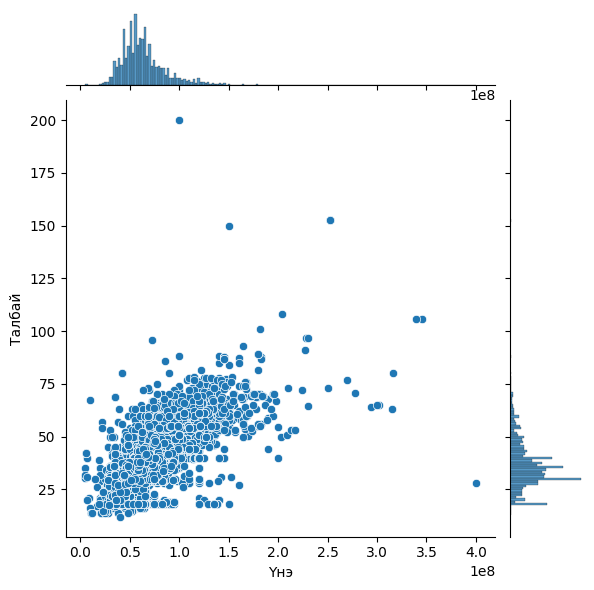

In [214]:
sns.jointplot(x = 'Үнэ', y = 'Талбай', data = data_2, kind = 'scatter')

### Талбайгаар нь бүлэглэж дундажийг олоод хоосон утгыг дүүргэх

In [215]:
bins = [0,20,35,50,65,80, np.inf]

In [216]:
bins_labels = ['1.20>','2.20-35','3.35-50','4.50-65','5.65-80','6.80<']

In [217]:
data_2["Талбай_bin"]=pd.cut(data_2['Талбай'], bins, labels=bins_labels)

In [218]:
data_2.head()

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,...,Байршил,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric,Талбай1,Талбай дундаж,Үнэ 1,Талбай_bin
0,0,Паркет,Тагтгүй,2020,Байхгүй,Вакум,16,Бүргэд,24.04,4,...,16-р хороолол,2020-12-15 09:55:00,BZD TSAIZ ZAKHYN BARUUN TALD SHINE 1 OROO BAIR,43000000.00,Улаанбаатар,24.04,NaN,28.93,1033720000.00,2.20-35
1,1,Паркет,1 тагттай,2009,Байхгүй,Вакум,17,Бүргэд,54.00,8,...,13-р хороолол,2020-12-15 08:08:00,NARAN TUUL ZAKHYN KHAJUUD 1 OROO,76000000.00,Улаанбаатар,54.00,NaN,34.94,4104000000.00,4.50-65
2,2,Паркет,Тагтгүй,2009,Байхгүй,Вакум,5,Бүргэд,38.60,5,...,Viva city,2021-01-02 10:40:00,VIVAD MANSARTTAI 1 URUU 38.6M2,66000000.00,Улаанбаатар,38.60,38.6,27.84,2547600000.00,3.35-50
3,3,Паркет,1 тагттай,2018,Байхгүй,Вакум,6,Бүргэд,31.00,1,...,Найрамдал,2021-01-02 13:01:00,NAIRAMDAL ZUSLAN DOTOR 1 OROO BAIR,72000000.00,Улаанбаатар,31.00,NaN,42.46,2232000000.00,2.20-35
4,4,Паркет,1 тагттай,2015,Байхгүй,Вакум,8,Бүргэд,38.00,8,...,16-р хороолол,2020-12-18 10:31:00,1 OROO BAIR,58000000.00,Улаанбаатар,38.00,NaN,35.18,2204000000.00,3.35-50


In [219]:
sem = data_2.groupby(['Байршил', 'Талбай_bin'])
sem1=sem.agg({"Үнэ":"mean"}).reset_index()

/tmp/ipykernel_12048/4005781207.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sem = data_2.groupby(['Байршил', 'Талбай_bin'])


In [220]:
sem1.head()

,Байршил,Талбай_bin,Үнэ
0,1-р хороолол,1.20>,57290410.96
1,1-р хороолол,2.20-35,53151244.44
2,1-р хороолол,3.35-50,61578085.53
3,1-р хороолол,4.50-65,89951562.50
4,1-р хороолол,5.65-80,84000000.00


In [221]:
data_2=data_2.merge(sem1, on=['Байршил', 'Талбай_bin'], how='left', suffixes=('', '_mean'))

In [222]:
data_2[data_2['Үнэ'].isna()]

,index,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,...,Огноо,Зарын гарчиг,Үнэ,Байрлал,Талбай_numeric,Талбай1,Талбай дундаж,Үнэ 1,Талбай_bin,Үнэ_mean
820,1062,Паркет,Тагтгүй,2018,Байхгүй,Вакум,16,Төмөр,105.00,13,...,2020-01-26 13:47:00,MERU TOWER-T 105MKV 2 OROO,NaN,Улаанбаатар,105.00,105,44.60,NaN,6.80<,212112500.00
6219,16460,Паркет,1 тагттай,2013,Байхгүй,Вакум,12,Бүргэд,30.00,1,...,2020-04-02 14:26:00,RAPID KHARSH KHOROOLOLD,NaN,Улаанбаатар,30.00,NaN,35.12,NaN,2.20-35,70942857.14


In [223]:
data_2["Үнэ"]=data_2["Үнэ"].fillna(data_2["Үнэ_mean"])

<Axes: ylabel='Frequency'>

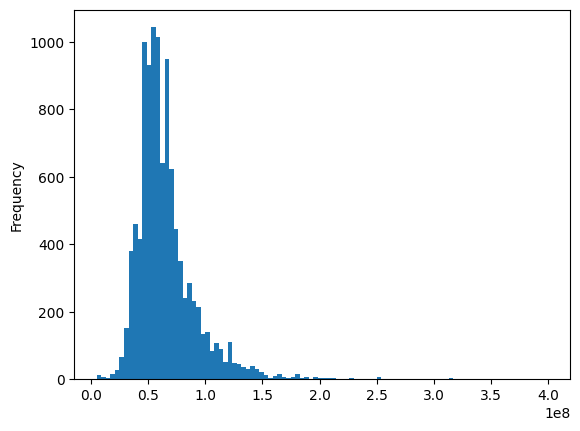

In [224]:
data_2["Үнэ"].plot(kind='hist', bins=100)

<Axes: xlabel='Үнэ'>

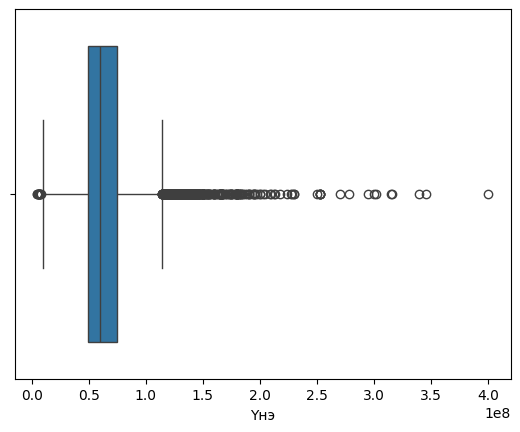

In [225]:
sns.boxplot(x="Үнэ", data = data_2)

In [226]:
data_2['Үнэ'].isnull().sum()

np.int64(0)

In [227]:
data_2["Үнэ"].describe()

count       10582.00
mean     65324454.67
std      26419697.53
min       5000000.00
25%      49000000.00
50%      60000000.00
75%      75000000.00
max     400000000.00
Name: Үнэ, dtype: float64

In [228]:
data_2.columns

Index(['index', 'Шал', 'Тагт', 'Ашиглалтанд орсон он', 'Гараж', 'Цонх',
       'Барилгын давхар', 'Хаалга', 'Талбай', 'Хэдэн давхарт', 'Лизинг',
       'Дүүрэг', 'Цонхны тоо', 'Байршил', 'Огноо', 'Зарын гарчиг', 'Үнэ',
       'Байрлал', 'Талбай_numeric', 'Талбай1', 'Талбай дундаж', 'Үнэ 1',
       'Талбай_bin', 'Үнэ_mean'],
      dtype='object')

### 6. Дата цэвэрлэж дуусгах

In [229]:
df = data_2.drop(['Талбай1', 'Талбай дундаж', 'Үнэ 1', 'Талбай_bin'], axis=1)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 10582 non-null  int64         
 1   Шал                   10582 non-null  category      
 2   Тагт                  10582 non-null  category      
 3   Ашиглалтанд орсон он  10582 non-null  int64         
 4   Гараж                 10582 non-null  category      
 5   Цонх                  10582 non-null  category      
 6   Барилгын давхар       10582 non-null  int32         
 7   Хаалга                10582 non-null  category      
 8   Талбай                10582 non-null  float64       
 9   Хэдэн давхарт         10582 non-null  int32         
 10  Лизинг                10582 non-null  category      
 11  Дүүрэг                10582 non-null  object        
 12  Цонхны тоо            10582 non-null  int32         
 13  Байршил         

In [231]:
df.to_csv("data_bair.csv", index=False)

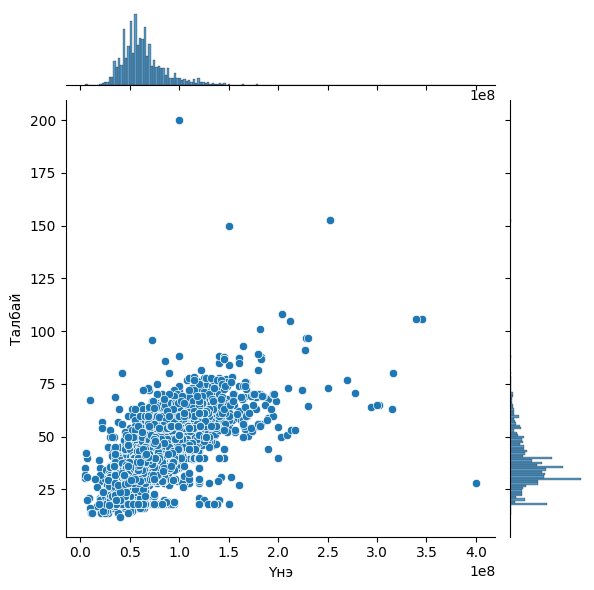

In [232]:
sns.jointplot(x = 'Үнэ', y = 'Талбай', data = data_2, kind = 'scatter')

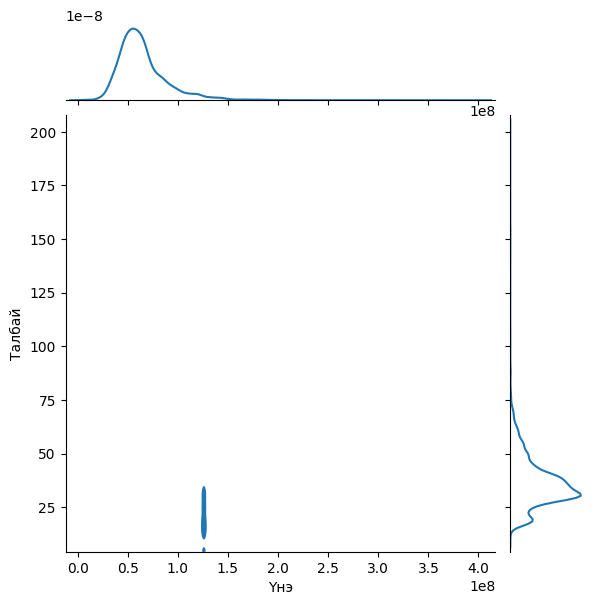

In [233]:
sns.jointplot(x = 'Үнэ', y = 'Талбай', kind = 'kde',data = data_2)

In [234]:
data_2['Үнэ_мкв'] = data_2['Үнэ']/data_2['Талбай']

In [235]:
temp = data_2.groupby(['Дүүрэг', 'Байршил'])
cam=temp.agg({'Үнэ_мкв':'mean'}).reset_index()
cam.head()

,Дүүрэг,Байршил,Үнэ_мкв
0,Багануур,Бусад,1079715.67
1,Багахангай,"3, 4 хороолол",1891891.89
2,Багахангай,Бусад,1166666.67
3,Баянгол,1-р хороолол,1707145.00
4,Баянгол,10-р хороолол,1772677.02
